## Importing libraries

In [41]:
import pandas as pd
pd.set_option("display.max_columns",200)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

import warnings
warnings.filterwarnings("ignore")

import missingno as msno

## Loading and Exploring data

In [2]:
train = pd.read_csv(r"..\data\train.csv")
print(f"The shape of train data: {train.shape}")
test = pd.read_csv(r"..\data\test.csv")
print(f"The shape of test data: {test.shape}")
data_dictionary = pd.read_csv(r"..\data\data_dictionary.csv")
print(f"The shape of data dictionary: {data_dictionary.shape}")

The shape of train data: (69999, 172)
The shape of test data: (30000, 171)
The shape of data dictionary: (36, 2)


In [3]:
# exploring data dictionary
data_dictionary

,Acronyms,Description
0,CIRCLE_ID,Telecom circle area to which the customer belo...
1,LOC,Local calls within same telecom circle
2,STD,STD calls outside the calling circle
3,IC,Incoming calls
4,OG,Outgoing calls
5,T2T,Operator T to T ie within same operator mobile...
6,T2M,Operator T to other operator mobile
7,T2O,Operator T to other operator fixed line
8,T2F,Operator T to fixed lines of T
9,T2C,Operator T to its own call center


- data dictionary defines the acronyms of each variable that we use in train and test

In [4]:
train.sample(5)

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
35924,35924,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,71.931,2.650,199.804,0.00,0.00,0.00,143.64,2.79,293.04,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,8.41,0.00,20.66,0.00,0.0,0.0,0.0,0.0,0.28,8.41,0.00,20.66,0.00,0.0,0.0,133.38,2.79,272.09,1.85,0.00,0.0,0.0,0.0,0.0,135.23,2.79,272.09,0.00,0.0,0.0,0.0,0.00,0.28,0.0,0.0,0.0,143.64,2.79,293.04,1.38,1.23,0.00,32.26,4.39,39.61,0.00,0.0,0.0,33.64,5.63,39.61,0.00,0.0,0.00,0.81,0.46,3.13,0.0,0.0,0.0,0.0,0.0,0.0,0.81,0.46,3.13,34.46,6.09,43.58,0.0,0.0,0.83,0.0,0.0,0.0,0.00,0.0,0.0,2,2,13,50,0,246,50,0,50,6/21/2014,7/25/2014,8/26/2014,0,0,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,486,0.0,0.0,0.0,0
8556,8556,109,0.0,0.0,0.0,6/30/2014,NaN,NaN,224.710,0.000,0.000,0.00,NaN,NaN,21.56,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,6.28,NaN,NaN,1.46,NaN,NaN,0.0,NaN,NaN,7.74,NaN,NaN,0.00,NaN,NaN,13.81,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,13.81,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,21.56,0.00,0.00,0.00,NaN,NaN,3.13,NaN,NaN,2.08,NaN,NaN,5.21,NaN,NaN,0.00,NaN,NaN,21.19,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,21.19,NaN,NaN,26.51,0.00,0.00,0.0,NaN,NaN,0.0,NaN,NaN,0.10,NaN,NaN,1,0,0,0,0,0,0,0,0,6/3/2014,NaN,NaN,0,0,0,6/5/2014,NaN,NaN,1.0,NaN,NaN,25.0,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,25.0,NaN,NaN,58.33,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.5,NaN,NaN,0.0,NaN,NaN,0,0,0,1,0,0,0,0,0,0

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [6]:
# exploring object columns
obj_cols = train.select_dtypes(include=['object']).columns
train[obj_cols].sample(5)

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
63582,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/22/2014,8/5/2014,NaN,NaN,NaN
15059,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/30/2014,8/27/2014,NaN,7/30/2014,8/27/2014
56569,6/30/2014,7/31/2014,8/31/2014,6/27/2014,7/26/2014,NaN,NaN,NaN,NaN
44054,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/30/2014,8/31/2014,NaN,NaN,NaN
38271,6/30/2014,7/31/2014,8/31/2014,6/30/2014,7/29/2014,8/31/2014,6/21/2014,7/29/2014,8/27/2014


- All categorical columns we have are actually datetime columns, so lets typecast them to datetime

In [7]:
# convert datetime columns from object to datetime
train[obj_cols] = train[obj_cols].apply(pd.to_datetime)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: datetime64[ns](9), float64(135), int64(28)
memory usage: 91.9 MB


In [8]:
# convert datetime columns from object to datetime in test data
test[obj_cols] = test[obj_cols].apply(pd.to_datetime)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: datetime64[ns](9), float64(135), int64(27)
memory usage: 39.1 MB


## Data Cleaning and Preprocessing

#### Missing Data

<Axes: >

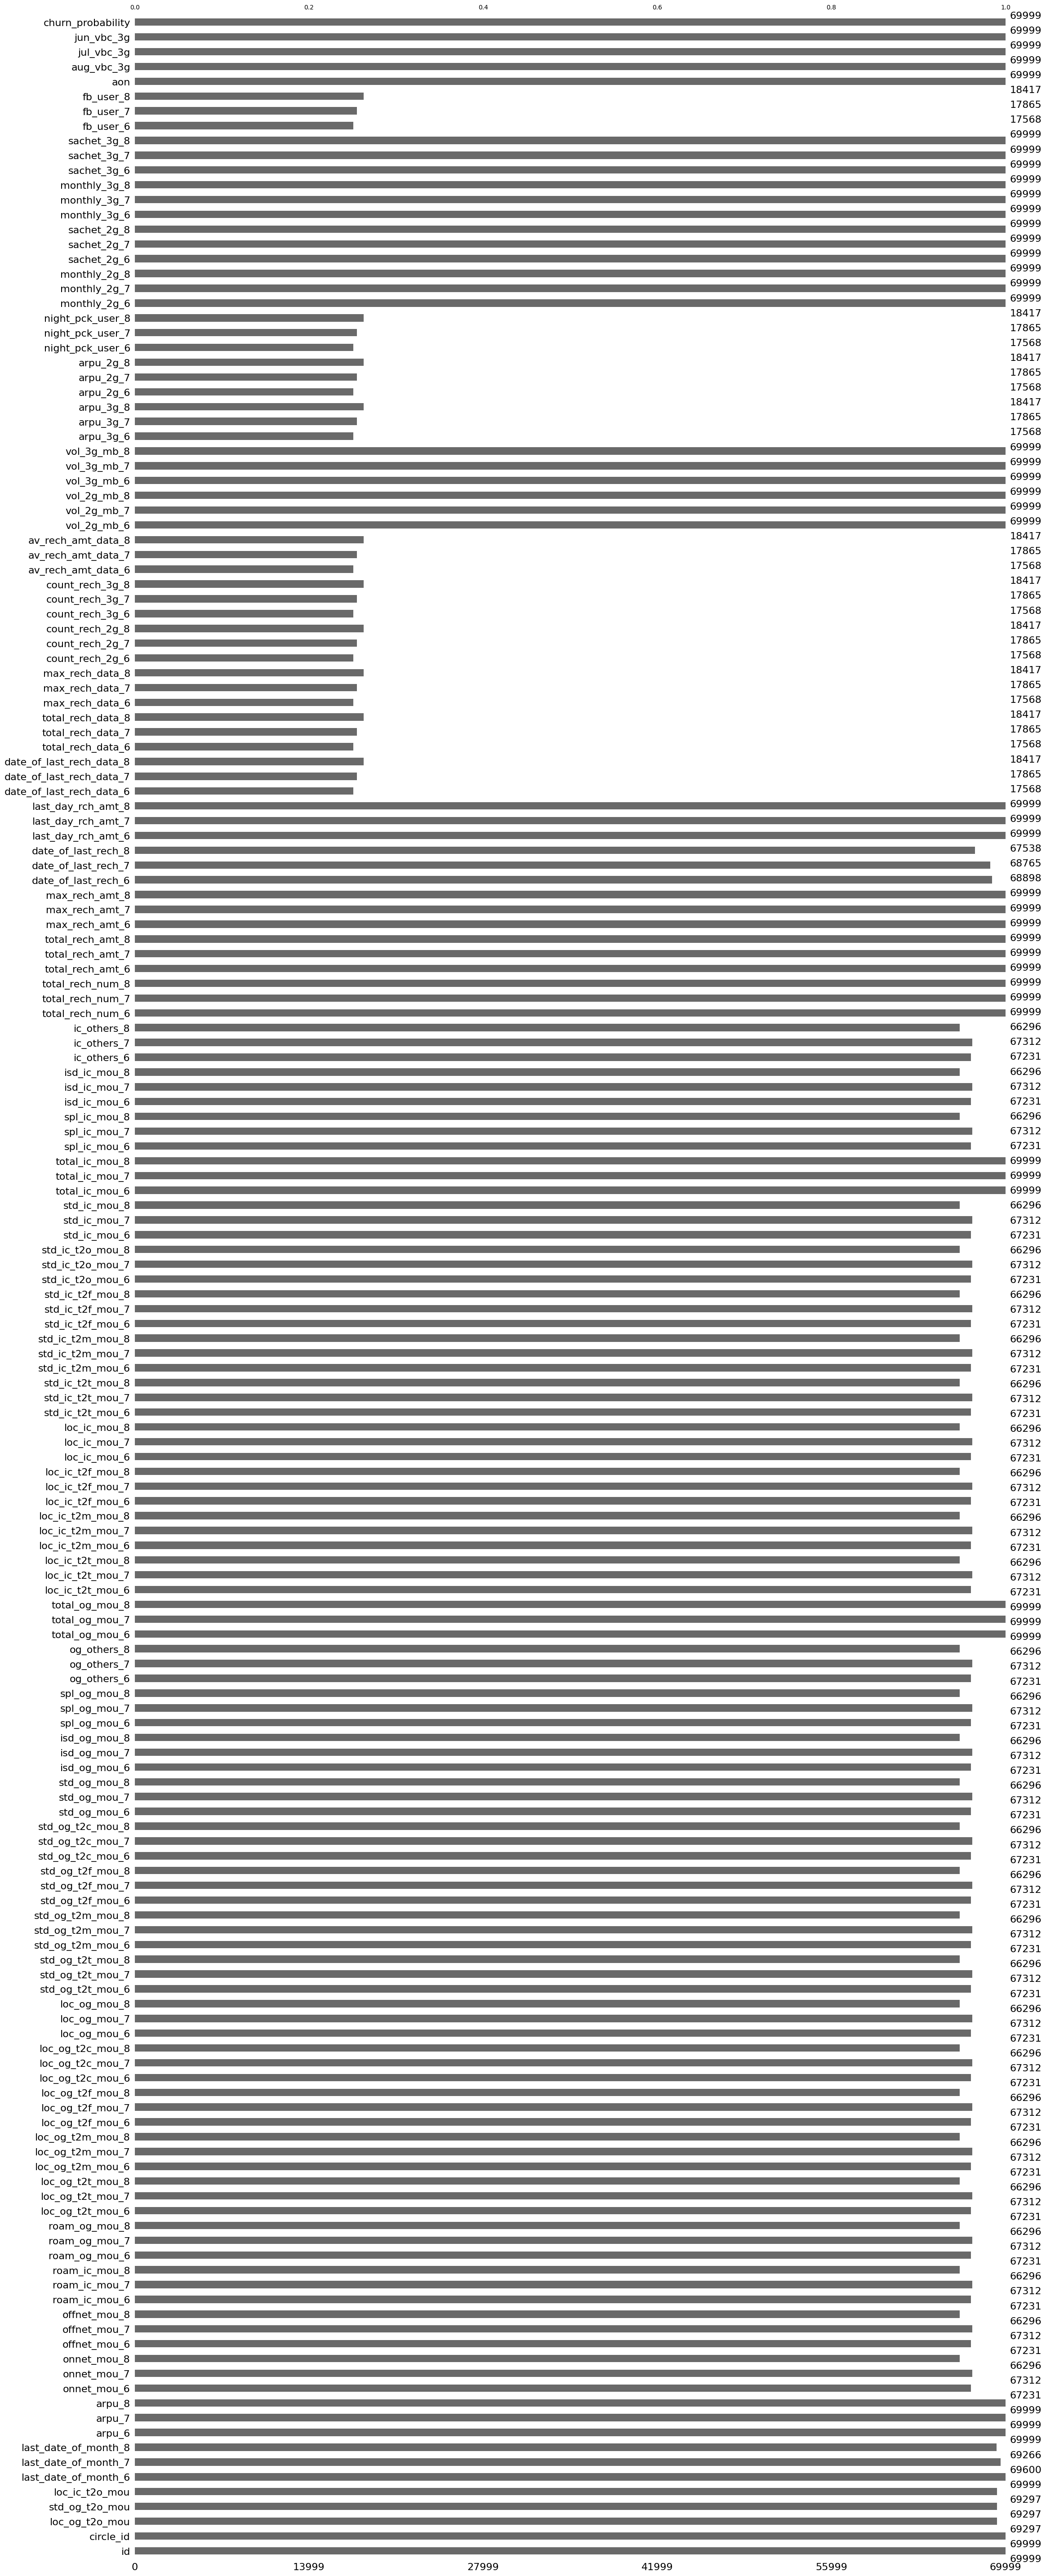

In [9]:
msno.bar(train)

In [10]:
# understanding the data missing in terms of proportions
missing_data_percent = 100*train.isnull().sum()/len(train)

# len(missing_data_percent[missing_data_percent.ge(73)].index) # 30
# len(missing_data_percent[(missing_data_percent.ge(5))&(missing_data_percent.le(5.3))].index) # 29
# len(missing_data_percent[(missing_data_percent.gt(0))&(missing_data_percent.lt(5))].index) # 66
# len(missing_data_percent[missing_data_percent.eq(0)].index) # 47

- We have 30 columns which have data missing in them by more than 73%.
- We have 29 columns which have data missing in them by 5% and 5.3%.
- We have 66 columns which have data missing in them by less than 5%.
- We have 47 columns which have no missing data.

In [11]:
# missing data in test
missing_data_percent_test = 100*test.isnull().sum()/len(test)

# len(missing_data_percent_test[missing_data_percent_test.ge(73)].index) # 30
# len(missing_data_percent_test[(missing_data_percent_test.ge(5))&(missing_data_percent_test.le(6))].index) # 29
# len(missing_data_percent_test[(missing_data_percent_test.gt(0))&(missing_data_percent_test.lt(5))].index) # 66
# len(missing_data_percent_test[missing_data_percent_test.eq(0)].index) # 46

- We have 30 columns which have data missing in them by more than 73%.
- We have 29 columns which have data missing in them by 5% and 6%.
- We have 66 columns which have data missing in them by less than 5%.
- We have 46 columns which have no missing data.

In [12]:
# checking if the columns we are about to drop are same in both test and train
# even if not same, we will drop the columns in test that we are dropping from train
assert (
    missing_data_percent_test[missing_data_percent_test.ge(73)].index == 
    missing_data_percent[missing_data_percent.ge(73)].index
).all()

In [13]:
# dropping 30 variables with data missing more than 73%
cols_to_include = missing_data_percent[missing_data_percent.lt(6)].index

# dropping from test
test = test[list(set(cols_to_include) - set(["churn_probability"]))]

# dropping from train
train = train[cols_to_include]
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 142 entries, id to churn_probability
dtypes: datetime64[ns](6), float64(108), int64(28)
memory usage: 75.8 MB


- Dropped 30 columns which has data missing in them by more than 6% (i.e., 73%) to reduce noise and potential bias.

In [14]:
# identifying categorical and numeric columns
datetime_cols = train.select_dtypes(include=['datetime64[ns]']).columns
num_cols = train.select_dtypes(include=['float64', 'int64']).columns

In [15]:
# exploring missing date columns
missing_date_patterns = train[datetime_cols].isnull().sum()
print(missing_date_patterns)

last_date_of_month_6       0
last_date_of_month_7     399
last_date_of_month_8     733
date_of_last_rech_6     1101
date_of_last_rech_7     1234
date_of_last_rech_8     2461
dtype: int64


In [16]:
# exploring the date columns
train[['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                            'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']].describe().T

,count,mean,min,25%,50%,75%,max
last_date_of_month_6,69999,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00,2014-06-30 00:00:00
last_date_of_month_7,69600,2014-07-31 00:00:00.000000256,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00,2014-07-31 00:00:00
last_date_of_month_8,69266,2014-08-30 23:59:59.999999744,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00,2014-08-31 00:00:00
date_of_last_rech_6,68898,2014-06-24 03:04:30.556474624,2014-06-01 00:00:00,2014-06-21 00:00:00,2014-06-27 00:00:00,2014-06-29 00:00:00,2014-06-30 00:00:00
date_of_last_rech_7,68765,2014-07-25 12:08:13.157856512,2014-07-01 00:00:00,2014-07-23 00:00:00,2014-07-27 00:00:00,2014-07-30 00:00:00,2014-07-31 00:00:00
date_of_last_rech_8,67538,2014-08-25 10:36:27.781693184,2014-08-01 00:00:00,2014-08-24 00:00:00,2014-08-27 00:00:00,2014-08-30 00:00:00,2014-08-31 00:00:00


- ['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8'] columns entirely have only one record in them. So we will fill these columns with specific date (unique/mean value from them)
- ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8'] columns have dates continuous over time. We will use "ffill" to fill these columns.

In [17]:
# filling 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8' with respective unique dates
date_series = train[['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']].mean().dt.date
date_dict = dict(zip(date_series.index, date_series.reset_index(drop=True)))

for col, date in date_dict.items():
    train[col] = train[col].fillna(pd.to_datetime(date))
    test[col] = test[col].fillna(pd.to_datetime(date))

# filling 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8' using "ffill"
for col in ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']:
    train[col] = train[col].fillna(method='ffill')
    test[col] = test[col].fillna(method='ffill')

In [18]:
# based on the skew and outliers we will decide if we have to use median or mean to fill the missing data
def imputation_metric(num_cols, df):
    strategy = {}
    for col in num_cols:
        skewness = skew(df[col].dropna())
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        
        if abs(skewness) > 1 or outliers > 0.05 * len(df):
            strategy[col] = 'median'
        else:
            strategy[col] = 'mean'
    return strategy

imputation_strategy_train = imputation_metric(num_cols, train)
imputation_strategy_test = imputation_metric(test.select_dtypes(include=['float64', 'int64']).columns, test)

In [19]:
# filling the missing numeric columns based on outliers and skewness
for col, strat in imputation_strategy_train.items():
    imputer = SimpleImputer(strategy=strat)
    train[[col]] = imputer.fit_transform(train[[col]])

for col, strat in imputation_strategy_test.items():
    imputer = SimpleImputer(strategy=strat)
    test[[col]] = imputer.fit_transform(test[[col]])

<Axes: >

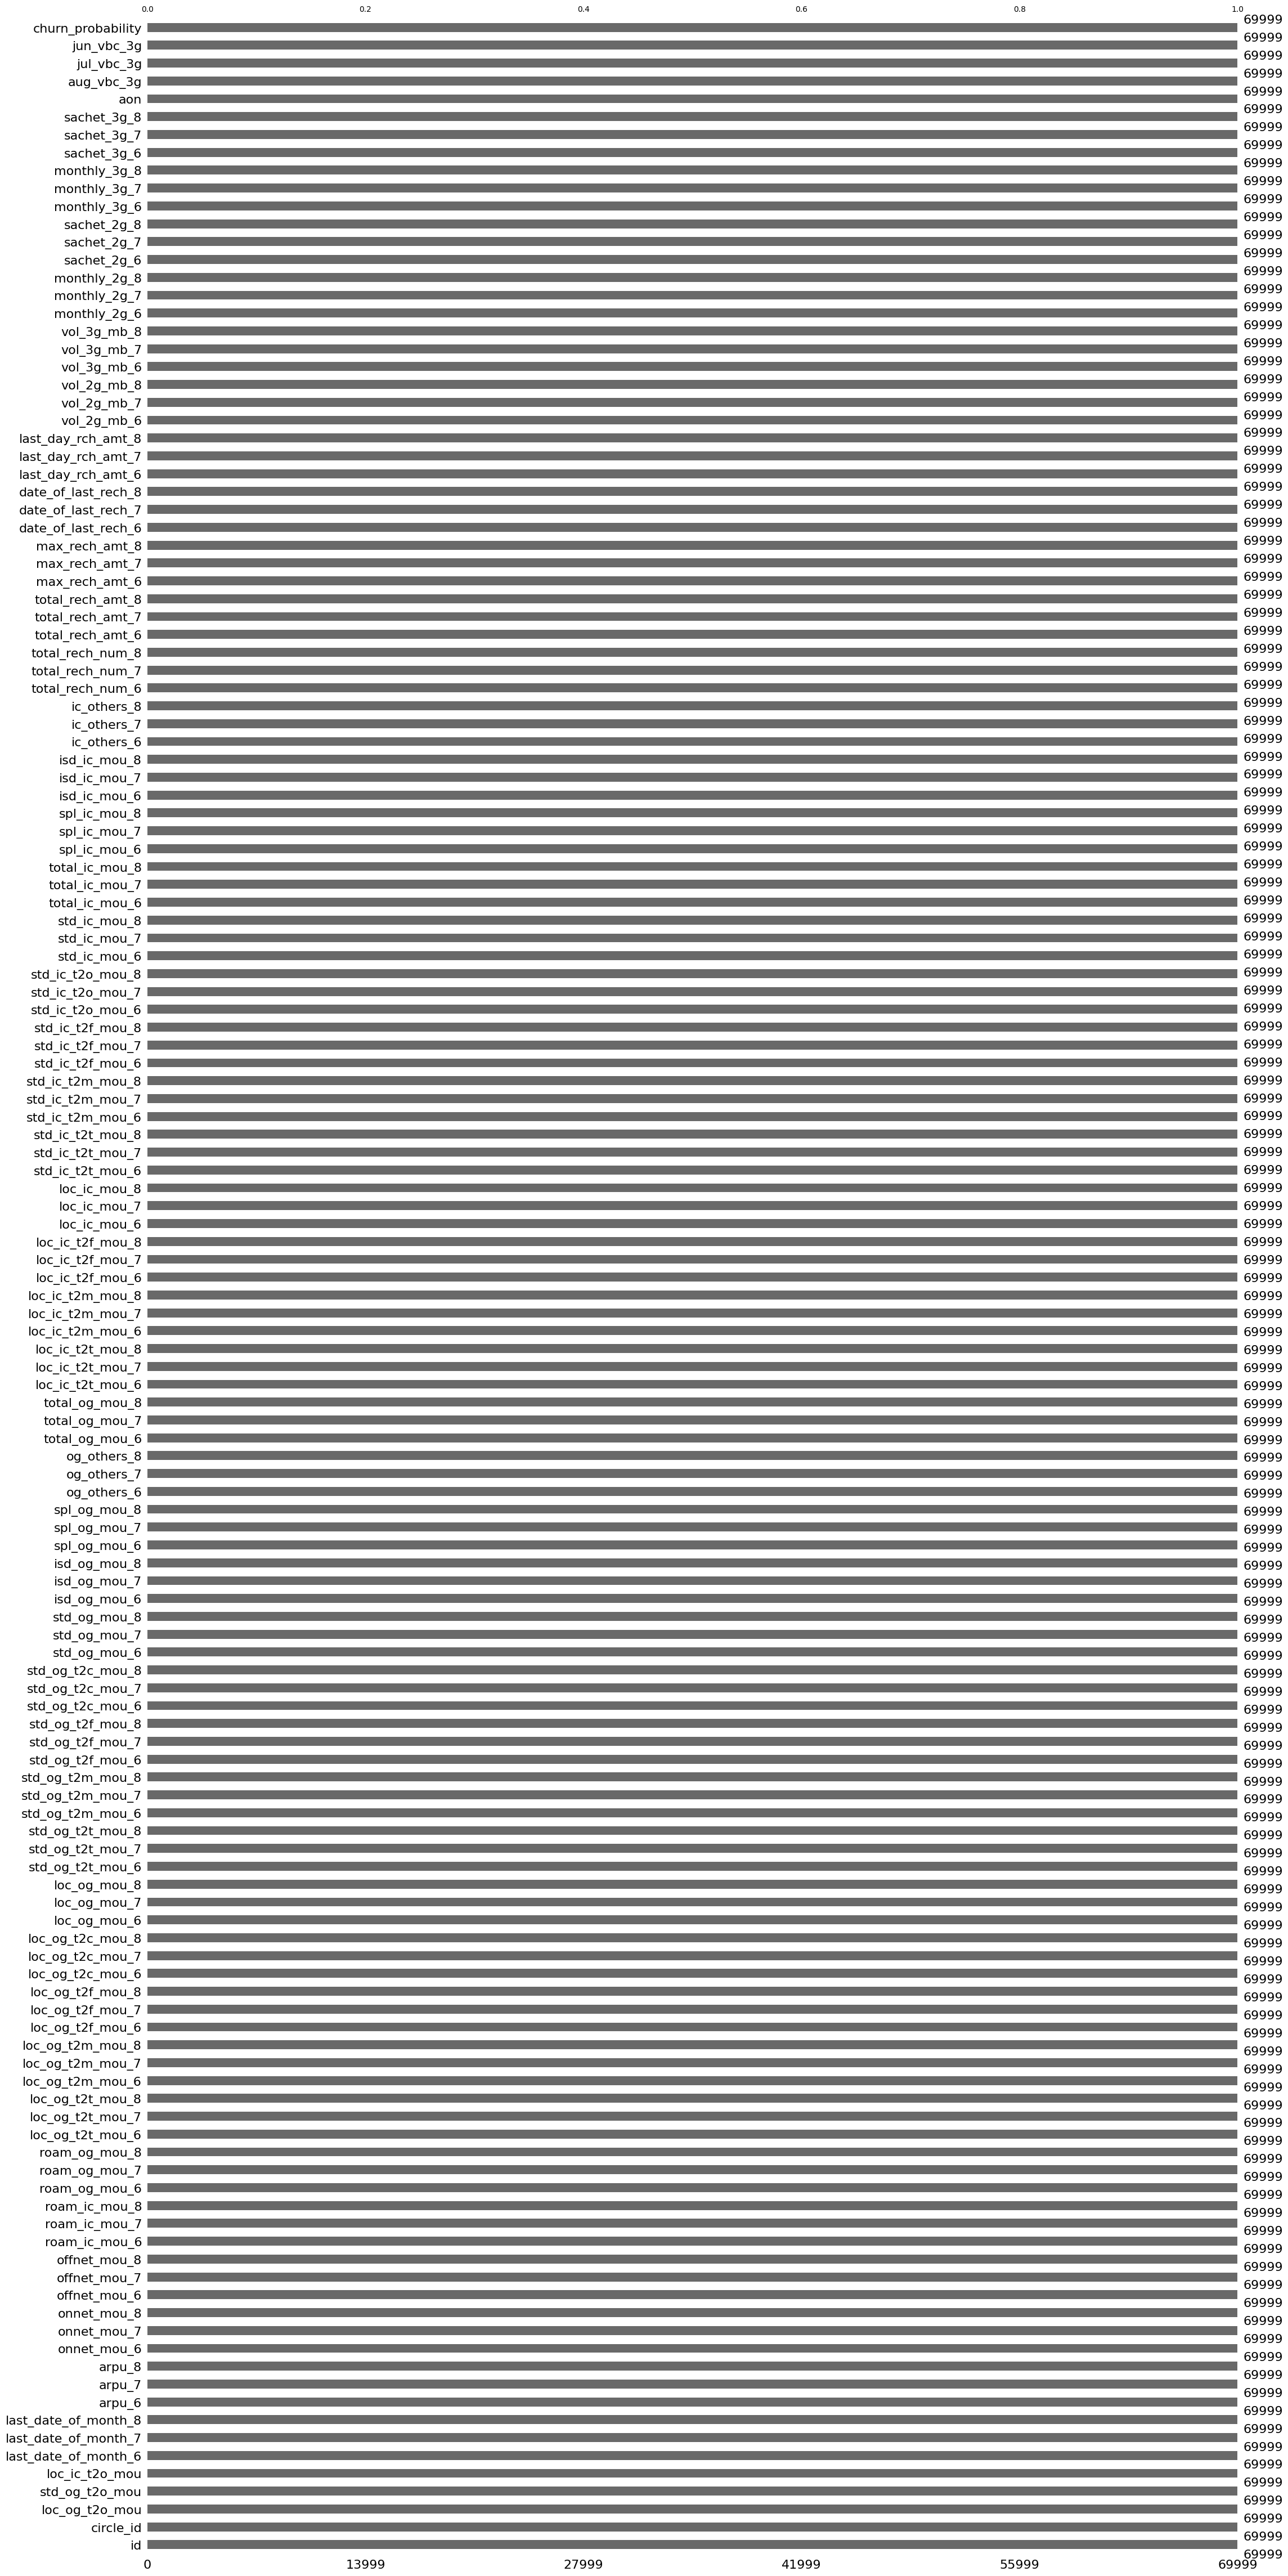

In [136]:
# checking if we still miss any data
msno.bar(train)

In [20]:
train.describe(include="all")

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69999.0,69999.0,69999.0,69999,69999,69999,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.0,69999.0,69999.0,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999,69999,69999,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,2014-06-30 00:00:00,2014-07-31 00:00:00,2014-08-30 23:44:55.255646208,283.134365,278.185912,278.858826,129.236765,129.993840

#### Feature Engineering

- To identify high value customers:
    - We can calculate total minutes used for outgoing and incoming
    - We can create a variable for total recharge done over the span of 3 months and average recharge per month
- To identify customers data and minutes patterns:
    - data usage ratio of 2g and 3g
    - average minutes of used voice call per month
    - total data used
    - average data used per month
- To identify roam services utilized by customers (to understand % of roaming customers use)
    - roaming use ratio per month for incoming and outgoing

In [21]:
def create_features(df):
    # total recharge amount for 3 months
    df['total_rech_amt_sum'] = df['total_rech_amt_6'] + df['total_rech_amt_7'] + df['total_rech_amt_8']

    # average recharge amount for 3 months
    df['avg_rech_amt_per_month'] = df[['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']].mean(axis=1)

    # usage ratio of 2g
    df['vol_2g_ratio'] = df['vol_2g_mb_6'] / (df['vol_3g_mb_6'] + 1)

    # usage ratio of 3g
    df['vol_3g_ratio'] = df['vol_3g_mb_6'] / (df['vol_2g_mb_6'] + 1)

    # total usage minutes - outgoing
    df['total_og_mou_sum'] = df['total_og_mou_6'] + df['total_og_mou_7'] + df['total_og_mou_8']

    # total usage minutes - incoming
    df['total_ic_mou_sum'] = df['total_ic_mou_6'] + df['total_ic_mou_7'] + df['total_ic_mou_8']

    # average usage per month - outgoing
    df['avg_og_mou_per_month'] = df[['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']].mean(axis=1)

    # average usage per month - incoming
    df['avg_ic_mou_per_month'] = df[['total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8']].mean(axis=1)

    # roaming usage ratio - outgoing
    df['roam_og_ratio_6'] = df['roam_og_mou_6'] / (df['total_og_mou_6'] + 1)
    df['roam_og_ratio_7'] = df['roam_og_mou_7'] / (df['total_og_mou_7'] + 1)
    df['roam_og_ratio_8'] = df['roam_og_mou_8'] / (df['total_og_mou_8'] + 1)

    # roaming usage ratio - incoming
    df['roam_ic_ratio_6'] = df['roam_ic_mou_6'] / (df['total_ic_mou_6'] + 1)
    df['roam_ic_ratio_7'] = df['roam_ic_mou_7'] / (df['total_ic_mou_7'] + 1)
    df['roam_ic_ratio_8'] = df['roam_ic_mou_8'] / (df['total_ic_mou_8'] + 1)

    # total data used
    df['total_data_mb_sum'] = df['vol_2g_mb_6'] + df['vol_2g_mb_7'] + df['vol_2g_mb_8'] + df['vol_3g_mb_6'] + df['vol_3g_mb_7'] + df['vol_3g_mb_8']

    # average data used per month
    df['avg_data_mb_per_month'] = df[['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8']].mean(axis=1)

    return df

train = create_features(train)
test = create_features(test)

##### Average Revenue Per User

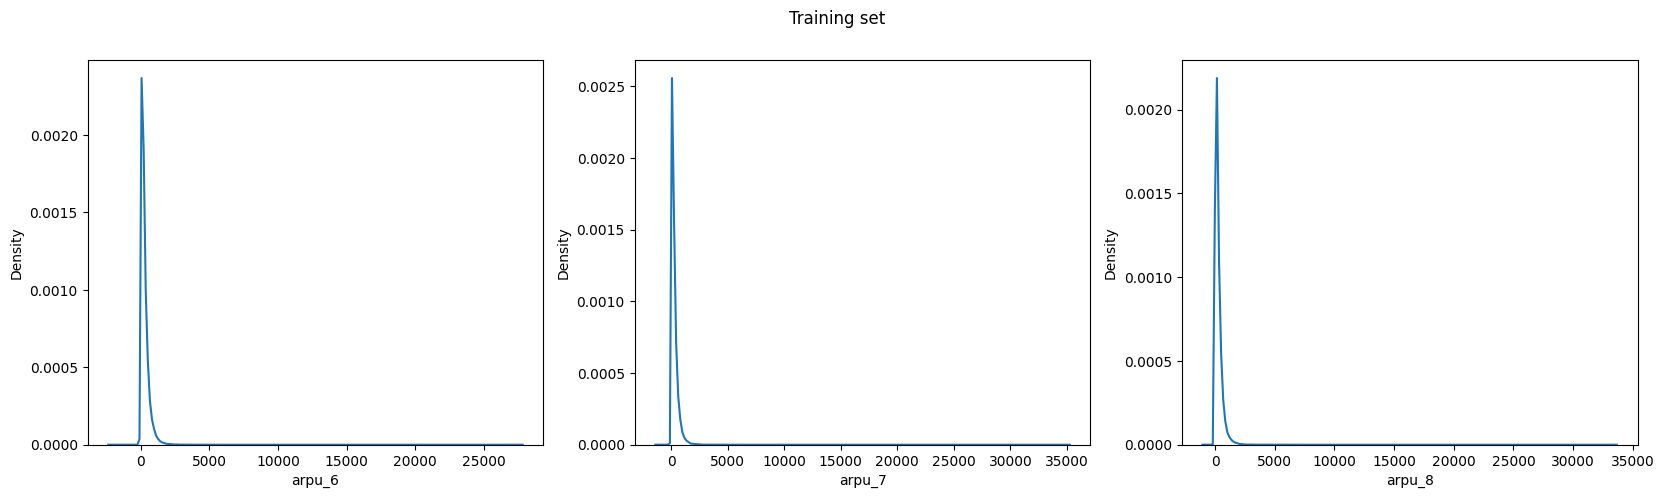

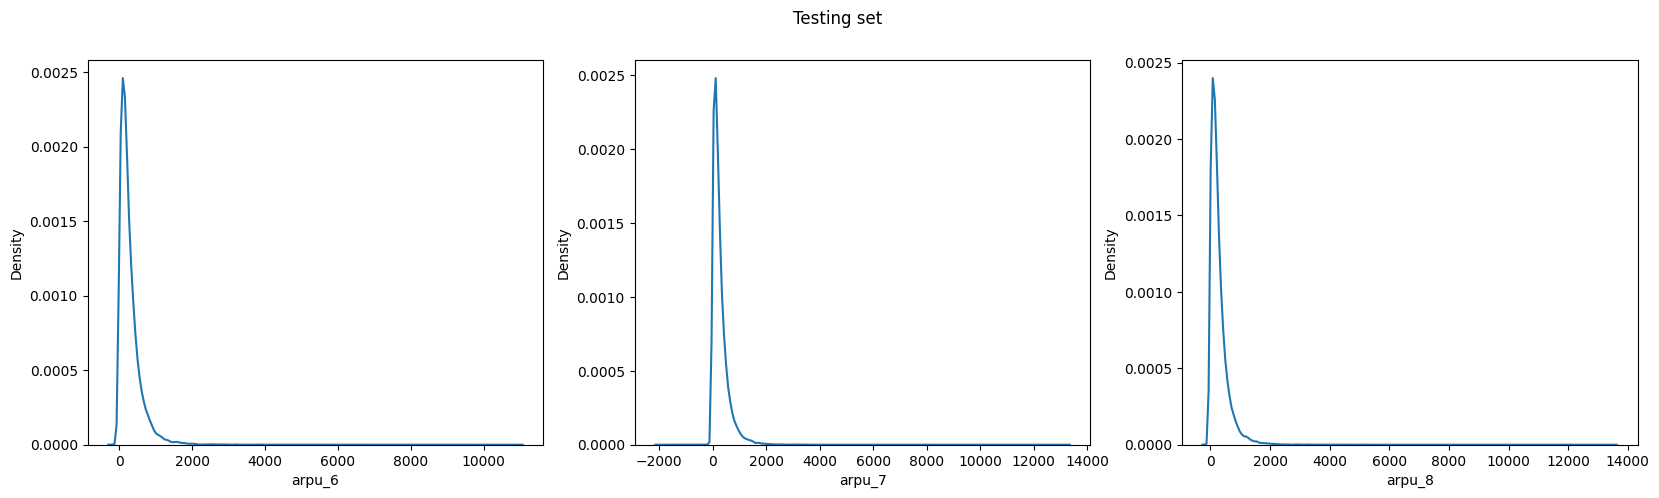

In [22]:
# lets explore the distribution of arpu for each month
def kde_plot(df,title):
    figure, ax = plt.subplots(ncols=3,figsize=(20,5))
    figure.suptitle(title)
    sns.kdeplot(x='arpu_6',data=df,ax=ax[0])
    sns.kdeplot(x='arpu_7',data=df,ax=ax[1])
    sns.kdeplot(x='arpu_8',data=df,ax=ax[2])
    plt.show()

kde_plot(train,"Training set")
kde_plot(test,"Testing set")

- As expected, we can that arpu for each month is skewed extremely right and there is low kurtosis.
- We can normalize this data by transforming the arpu for each month by log.

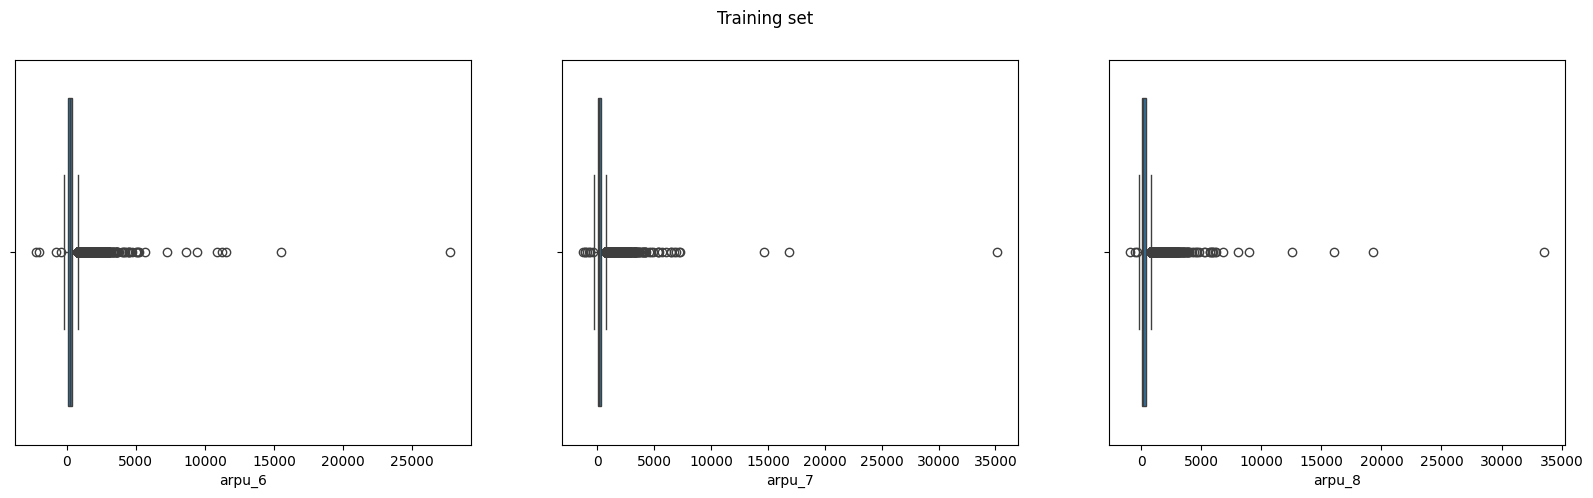

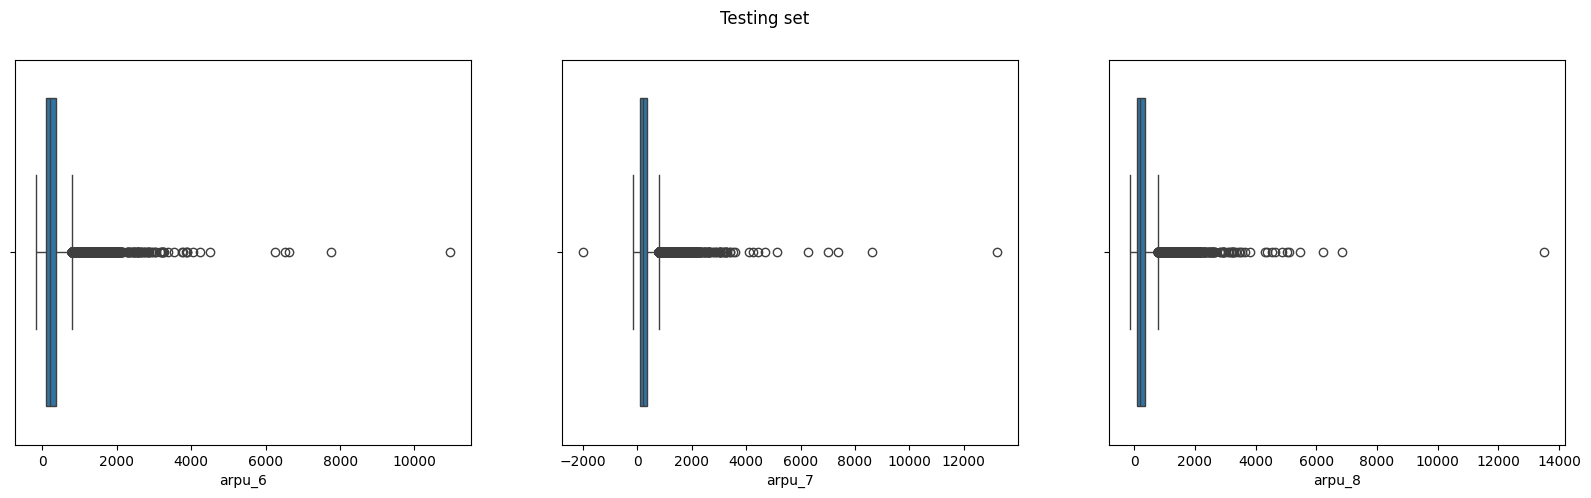

In [23]:
# boxplot for arpu for each month
def box_plot(df,title):
    figure, ax = plt.subplots(ncols=3,figsize=(20,5))
    figure.suptitle(title)
    sns.boxplot(x='arpu_6',data=df,ax=ax[0])
    sns.boxplot(x='arpu_7',data=df,ax=ax[1])
    sns.boxplot(x='arpu_8',data=df,ax=ax[2])
    plt.show()

box_plot(train,"Training set")
box_plot(test,"Testing set")

- There are negative values present in each arpu for each month of training and testing set.
- Additionally, we can see that there are negative outliers for training and testing set. We will drop these records.

In [24]:
def drop_negative_outliers(df):
    for col in ['arpu_6','arpu_7','arpu_8']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        df = df[df[col] >= lower_bound]
    return df

train = drop_negative_outliers(train)
# test = drop_negative_outliers(test)

In [25]:
# log transformation of arpu for each month
def log_transform(df):
    df['arpu_6_log'] = np.log1p(df['arpu_6'].apply(lambda x: x if x > 0 else 1))
    df['arpu_7_log'] = np.log1p(df['arpu_7'].apply(lambda x: x if x > 0 else 1))
    df['arpu_8_log'] = np.log1p(df['arpu_8'].apply(lambda x: x if x > 0 else 1))
    return df

train = log_transform(train)
test = log_transform(test)

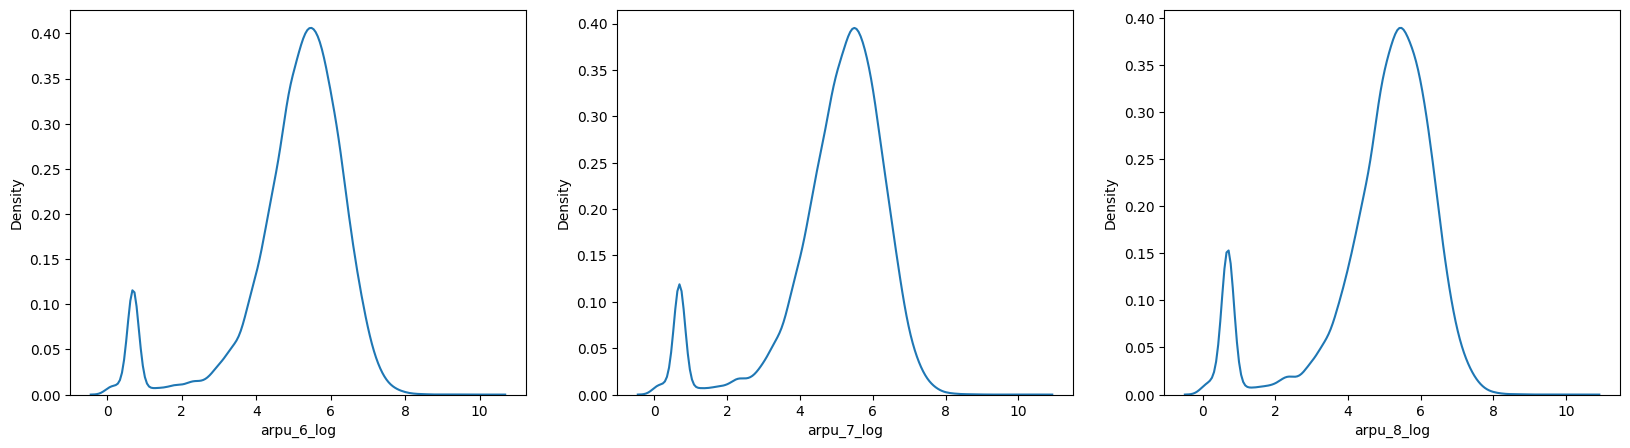

In [26]:
# lets explore the distribution of log transformed arpu for each month
figure, ax = plt.subplots(ncols=3,figsize=(20,5))
sns.kdeplot(x='arpu_6_log',data=train,ax=ax[0])
sns.kdeplot(x='arpu_7_log',data=train,ax=ax[1])
sns.kdeplot(x='arpu_8_log',data=train,ax=ax[2])
plt.show()

In [27]:
# scaling the newly added totals, averages, ratios
scaler = StandardScaler()
added_columns = ['total_og_mou_sum', 'total_ic_mou_sum', 'avg_og_mou_per_month', 'avg_ic_mou_per_month',
                     'roam_og_ratio_6', 'roam_og_ratio_7', 'roam_og_ratio_8', 'roam_ic_ratio_6', 
                     'roam_ic_ratio_7', 'roam_ic_ratio_8', 'total_rech_amt_sum', 'avg_rech_amt_per_month',
                     'total_data_mb_sum', 'avg_data_mb_per_month', 'vol_2g_ratio', 'vol_3g_ratio']
train[added_columns] = scaler.fit_transform(train[added_columns])
test[added_columns] = scaler.fit_transform(test[added_columns])

### Feature Selection

In [28]:
X = train.drop(columns=['churn_probability']).drop(columns=datetime_cols)
y = train['churn_probability']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


sfm = SelectFromModel(model, threshold='mean', prefit=True)
X_train_selected = sfm.transform(X_train)
selected_features = X_train.columns[sfm.get_support(indices=True)]


X_valid_selected = sfm.transform(X_valid)
X_test_selected = sfm.transform(test.drop(columns=datetime_cols))

X_train_selected = pd.DataFrame(X_train_selected, columns=selected_features)
X_valid_selected = pd.DataFrame(X_valid_selected, columns=selected_features)
X_test_selected = pd.DataFrame(X_test_selected, columns=selected_features)

## Model Building

#### Iteration 1

In [34]:
# building model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_selected, y_train)

# validation
y_pred_valid = model.predict(X_valid_selected)
print("Validation Set Performance:")
print(classification_report(y_valid, y_pred_valid))
print("Accuracy:", accuracy_score(y_valid, y_pred_valid))

Validation Set Performance:
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     12535
         1.0       0.78      0.58      0.66      1463

    accuracy                           0.94     13998
   macro avg       0.87      0.78      0.82     13998
weighted avg       0.93      0.94      0.93     13998

Accuracy: 0.9391341620231461


In [39]:
# fitting model on whole data
X_train_new = pd.concat([X_train_selected,X_valid_selected])
y_train_new = pd.concat([y_train,y_valid])
model.fit(X_train_new, y_train_new)

# predictions
y_pred_test = model.predict(X_test_selected)

# saving predictions
submission = test[['id']].copy()
submission['churn_probability'] = y_pred_test
submission.id = submission.id.astype('int64')
submission.churn_probability = submission.churn_probability.astype('int64')
submission.to_csv(r'..\data\churn_predictions_iteration_1.csv', index=False)

#### Iteration 2

In [42]:
# random forest classifier
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestClassifier(random_state=42)
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy', verbose=1)
rf_grid_search.fit(X_train_selected, y_train)

print("Random Forest - Best Parameters:", rf_grid_search.best_params_)
print("Random Forest - Best Score:", rf_grid_search.best_score_)

# running best estimator
best_model = rf_grid_search.best_estimator_

# validation
best_model.fit(X_train_selected, y_train)
valid_pred_proba = best_model.predict_proba(X_valid_selected)[:, 1]
valid_auc = roc_auc_score(y_valid, valid_pred_proba)
print(f"Validation ROC AUC: {valid_auc}")

# fitting model on whole data
X_train_new = pd.concat([X_train_selected, X_valid_selected])
y_train_new = pd.concat([y_train,y_valid])
best_model.fit(X_train_new, y_train_new)

# predictions
y_pred_test = best_model.predict_proba(X_test_selected)[:, 1]

# saving predictions
submission = test[['id']].copy()
submission['churn_probability'] = y_pred_test
submission.id = submission.id.astype('int64')
submission.churn_probability = submission.churn_probability.astype('int64')
submission.to_csv(r'..\data\churn_predictions_iteration_2_rf.csv', index=False)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Random Forest - Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Best Score: 0.940915875665992
Validation ROC AUC: 0.9322225315255357


In [43]:
# xgboost classifier
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

xgb_model = XGBClassifier(random_state=42)
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42, verbose=1)
xgb_random_search.fit(X_train_selected, y_train)

print("XGBoost - Best Parameters:", xgb_random_search.best_params_)
print("XGBoost - Best Score:", xgb_random_search.best_score_)

# running best estimator
best_model = xgb_random_search.best_estimator_

# validation
best_model.fit(X_train_selected, y_train)
valid_pred_proba = best_model.predict_proba(X_valid_selected)[:, 1]
valid_auc = roc_auc_score(y_valid, valid_pred_proba)
print(f"Validation ROC AUC: {valid_auc}")

# fitting model on whole data
X_train_new = pd.concat([X_train_selected, X_valid_selected])
y_train_new = pd.concat([y_train,y_valid])
best_model.fit(X_train_new, y_train_new)

# predictions
y_pred_test = best_model.predict_proba(X_test_selected)[:, 1]

# saving predictions
submission = test[['id']].copy()
submission['churn_probability'] = y_pred_test
submission.id = submission.id.astype('int64')
submission.churn_probability = submission.churn_probability.astype('int64')
submission.to_csv(r'..\data\churn_predictions_iteration_2_xgb.csv', index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
XGBoost - Best Parameters: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
XGBoost - Best Score: 0.9409158501443956
Validation ROC AUC: 0.9370943313609112


In [44]:
# lgboost classifier
lgbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.3],
    'reg_lambda': [0, 0.1, 0.3]
}

lgbm_model = LGBMClassifier(random_state=42)
lgbm_random_search = RandomizedSearchCV(estimator=lgbm_model, param_distributions=lgbm_param_grid, n_iter=50, cv=5, scoring='accuracy', random_state=42, verbose=1)
lgbm_random_search.fit(X_train_selected, y_train)

print("LightGBM - Best Parameters:", lgbm_random_search.best_params_)
print("LightGBM - Best Score:", lgbm_random_search.best_score_)

# running best estimator
best_model = lgbm_random_search.best_estimator_

# validation
best_model.fit(X_train_selected, y_train)
valid_pred_proba = best_model.predict_proba(X_valid_selected)[:, 1]
valid_auc = roc_auc_score(y_valid, valid_pred_proba)
print(f"Validation ROC AUC: {valid_auc}")

# fitting model on whole data
X_train_new = pd.concat([X_train_selected, X_valid_selected])
y_train_new = pd.concat([y_train,y_valid])
best_model.fit(X_train_new, y_train_new)

# predictions
y_pred_test = best_model.predict_proba(X_test_selected)[:, 1]

# saving predictions
submission = test[['id']].copy()
submission['churn_probability'] = y_pred_test
submission.id = submission.id.astype('int64')
submission.churn_probability = submission.churn_probability.astype('int64')
submission.to_csv(r'..\data\churn_predictions_iteration_2_lgbm.csv', index=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 4535, number of negative: 40255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10145
[LightGBM] [Info] Number of data points in the train set: 44790, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101250 -> initscore=-2.183409
[LightGBM] [Info] Start training from score -2.183409
[LightGBM] [Info] Number of positive: 4535, number of negative: 40255
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022487 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10143
[LightGBM] [Info] Number of data points in the train set: 44790, number of used features: 42
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.101250 -> initscore=-2.183409
[Lig

In [45]:
# gradient boosting machine
gbm_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gbm_model = GradientBoostingClassifier(random_state=42)
gbm_grid_search = GridSearchCV(estimator=gbm_model, param_grid=gbm_param_grid, cv=5, scoring='accuracy', verbose=1)
gbm_grid_search.fit(X_train_selected, y_train)

print("GBM - Best Parameters:", gbm_grid_search.best_params_)
print("GBM - Best Score:", gbm_grid_search.best_score_)

# running best estimator
best_model = gbm_grid_search.best_estimator_

# validation
best_model.fit(X_train_selected, y_train)
valid_pred_proba = best_model.predict_proba(X_valid_selected)[:, 1]
valid_auc = roc_auc_score(y_valid, valid_pred_proba)
print(f"Validation ROC AUC: {valid_auc}")

# fitting model on whole data
X_train_new = pd.concat([X_train_selected, X_valid_selected])
y_train_new = pd.concat([y_train,y_valid])
best_model.fit(X_train_new, y_train_new)

# predictions
y_pred_test = best_model.predict_proba(X_test_selected)[:, 1]

# saving predictions
submission = test[['id']].copy()
submission['churn_probability'] = y_pred_test
submission.id = submission.id.astype('int64')
submission.churn_probability = submission.churn_probability.astype('int64')
submission.to_csv(r'..\data\churn_predictions_iteration_2_gbm.csv', index=False)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
GBM - Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100, 'subsample': 0.8}
GBM - Best Score: 0.9408622882889863
Validation ROC AUC: 0.9329544261713136


### Iteration 4
-- The following is not part of main implementation (its my part of exploring the model)

In [56]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

#### t1

In [47]:
X = pd.concat([X_train_selected,X_valid_selected])
y = pd.concat([y_train,y_valid])



print('Original dataset shape:', Counter(y))
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
print('Resampled dataset shape:', Counter(y_resampled))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


Original dataset shape: Counter({0.0: 62854, 1.0: 7132})
Resampled dataset shape: Counter({0.0: 7132, 1.0: 7132})
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      1444
         1.0       0.88      0.84      0.86      1409

    accuracy                           0.87      2853
   macro avg       0.87      0.87      0.87      2853
weighted avg       0.87      0.87      0.87      2853



In [48]:
# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# predictions
y_pred_test = best_model.predict_proba(X_test_selected)[:, 1]

# saving predictions
submission = test[['id']].copy()
submission['churn_probability'] = y_pred_test
submission.id = submission.id.astype('int64')
submission.churn_probability = submission.churn_probability.astype('int64')
submission.to_csv(r'..\data\churn_predictions_iteration_4_t1.csv', index=False)

#### t2

In [55]:
X = pd.concat([X_train_selected,X_valid_selected])
y = pd.concat([y_train,y_valid])

# Check the class distribution before sampling
print('Original dataset shape:', Counter(y))

# Apply SMOTETomek
smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X, y)

# Check the class distribution after sampling
print('Resampled dataset shape:', Counter(y_resampled))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_resampled, y_resampled)

# predictions
y_pred_test = best_model.predict_proba(X_test_selected)[:, 1]

# saving predictions
submission = test[['id']].copy()
submission['churn_probability'] = y_pred_test
submission.id = submission.id.astype('int64')
submission.churn_probability = submission.churn_probability.astype('int64')
submission.to_csv(r'..\data\churn_predictions_iteration_4_t2.csv', index=False)


Original dataset shape: Counter({0.0: 62854, 1.0: 7132})
Resampled dataset shape: Counter({0.0: 62653, 1.0: 62653})
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95     12547
         1.0       0.95      0.95      0.95     12515

    accuracy                           0.95     25062
   macro avg       0.95      0.95      0.95     25062
weighted avg       0.95      0.95      0.95     25062



In [57]:
X = train.drop(columns=['churn_probability']).drop(columns=datetime_cols)
y = train['churn_probability']
_,_, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

X = pd.concat([X_train_selected,X_valid_selected])
y = pd.concat([y_train,y_valid])

# Check the class distribution before sampling
print('Original dataset shape:', Counter(y))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Balanced Random Forest classifier
clf = BalancedRandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Train a classifier
clf = BalancedRandomForestClassifier(random_state=42)
clf.fit(X, y)

# predictions
y_pred_test = best_model.predict_proba(X_test_selected)[:, 1]

# saving predictions
submission = test[['id']].copy()
submission['churn_probability'] = y_pred_test
submission.id = submission.id.astype('int64')
submission.churn_probability = submission.churn_probability.astype('int64')
submission.to_csv(r'..\data\churn_predictions_iteration_4_t3.csv', index=False)

Original dataset shape: Counter({0.0: 62854, 1.0: 7132})
              precision    recall  f1-score   support

         0.0       0.98      0.89      0.94     12611
         1.0       0.47      0.86      0.61      1387

    accuracy                           0.89     13998
   macro avg       0.73      0.88      0.77     13998
weighted avg       0.93      0.89      0.90     13998

